In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 209)
X teste =  (380959, 209)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[-0.01748416, -0.01043913, -0.22852587, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01451114, -0.05162145, -0.21763962, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.0138642 , -0.07942324, -0.19117479, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       ...,
       [-0.01757447, -0.08518431, -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01757443, -0.08518431, -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01689867,  0.00305292,  0.21032584, ..., -0.00662391,
        -0.1405063 , -0.0077944 ]])

In [6]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

152963      Benign
627588      Benign
37398       Benign
486419      Benign
1203796     Benign
            ...   
110268      Benign
259178      Benign
131932     Generic
671155     Generic
121958      Benign
Name: Label_multiclass, Length: 888903, dtype: object
152963     0
627588     0
37398      0
486419     0
1203796    0
          ..
110268     0
259178     0
131932     1
671155     1
121958     0
Name: Label_binary, Length: 888903, dtype: int64


In [8]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [9]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [10]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [11]:
with open('df_unsw_test50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [12]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 209)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [13]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [18]:
#X_test50.head()
X_test50

array([[-0.0175557 , -0.08488696, -0.24198117, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.0175575 , -0.08458962, -0.24188733, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01757438, -0.0823967 , -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       ...,
       [-0.01748007, -0.04924269, -0.22879568, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [ 0.01233876,  0.16659285,  2.97259296, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01706993,  0.60331879, -0.22310621, ..., -0.00662391,
        -0.1405063 , -0.0077944 ]])

In [19]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']
[0 0 0 ... 0 0 0]


In [20]:
#X_test50.shape

In [21]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo LightBGM para Train e Validation - Train50

In [22]:
!pip3 install lightgbm

     |████████████████████████████████| 2.0 MB 780 kB/s eta 0:00:01     |███████████████████████████▊    | 1.7 MB 780 kB/s eta 0:00:01


In [23]:
import lightgbm as lgb

### Predição train50 binária

In [24]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [25]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [26]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [27]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9986691481235513

### Visualização da árvore binária

In [30]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [31]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [32]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

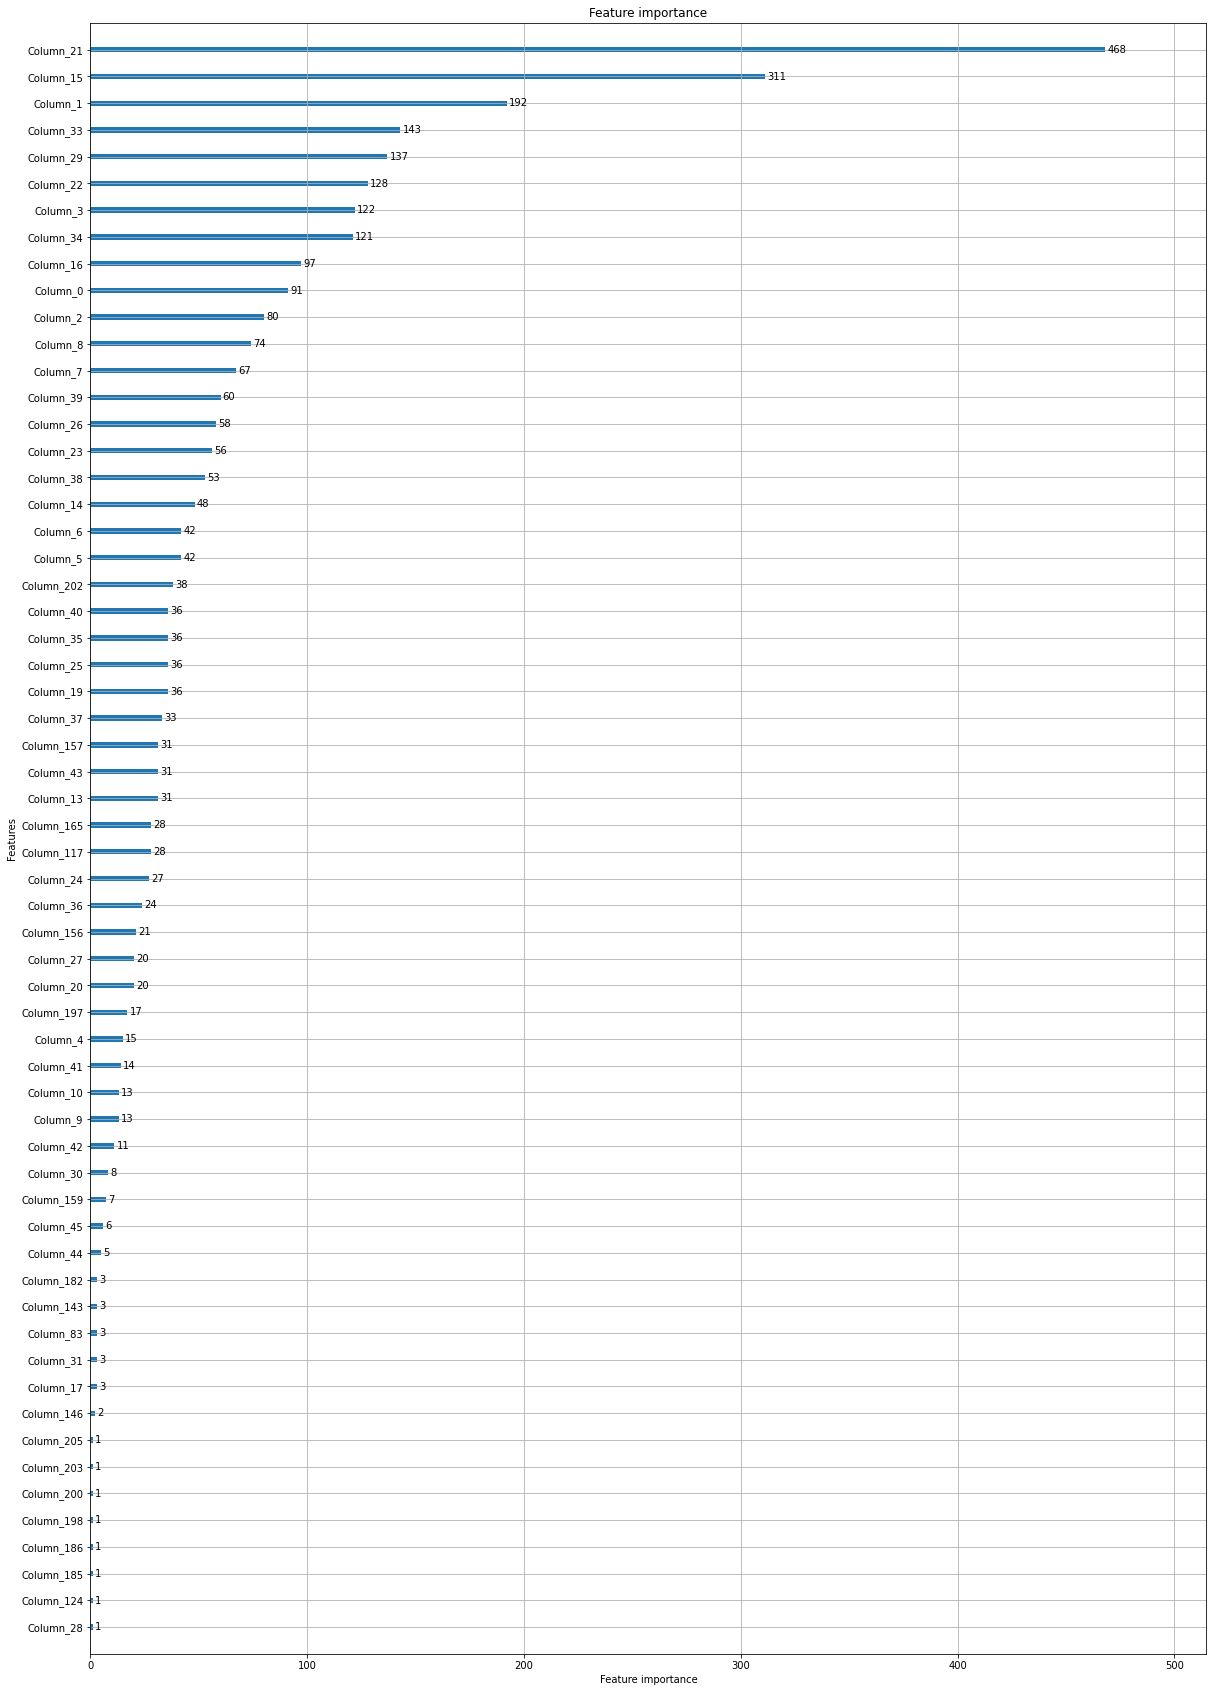

In [33]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [34]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [35]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [36]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [37]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [38]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [39]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9778401350276539

### Visualização da árvore multiclasse

In [40]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [41]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

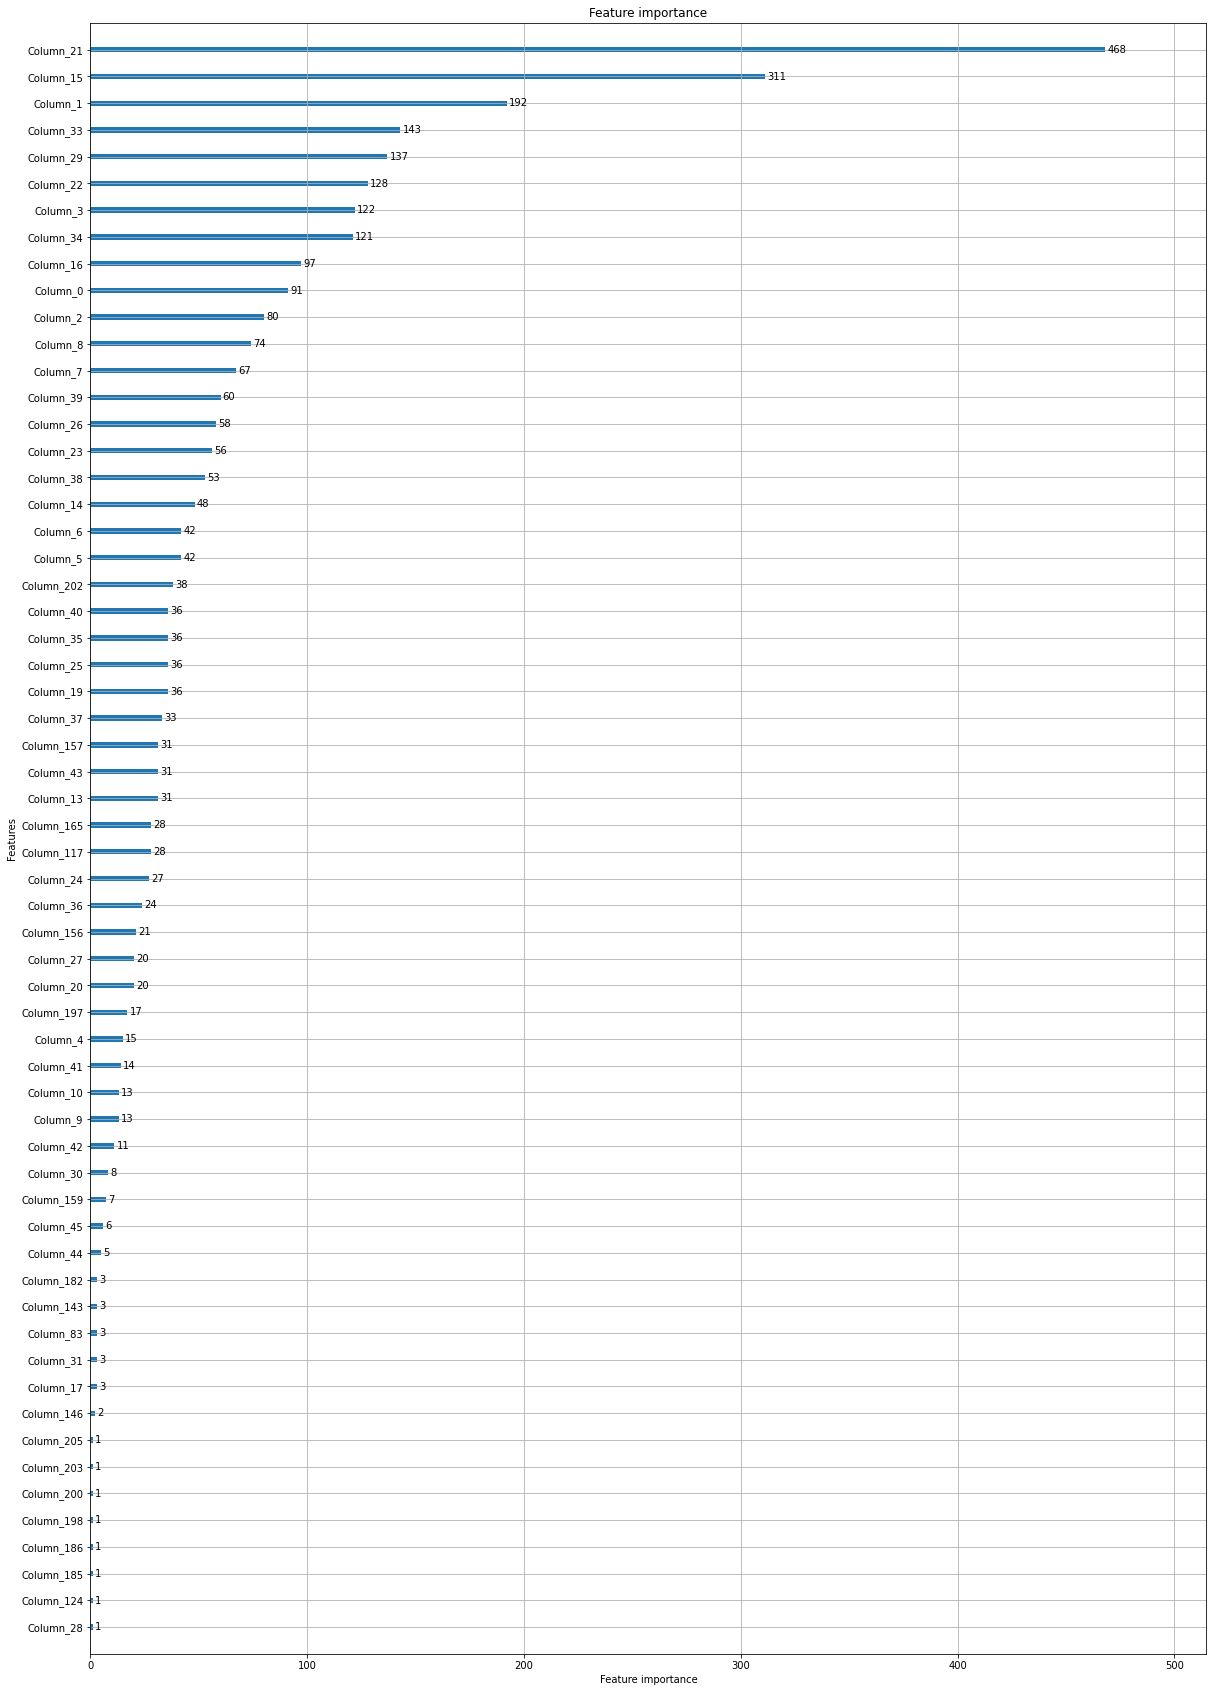

In [42]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [43]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [44]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999321  0.999156  0.999238    332789
           1   0.994173  0.995308  0.994740     48170

    accuracy                       0.998669    380959
   macro avg   0.996747  0.997232  0.996989    380959
weighted avg   0.998670  0.998669  0.998669    380959



In [45]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.057996  0.084615  0.068822       390
      Backdoor   0.052308  0.048159  0.050147       353
        Benign   0.996929  0.996809  0.996869    332789
           DoS   0.321904  0.324654  0.323273      2458
      Exploits   0.633570  0.664479  0.648657      6703
       Fuzzers   0.707493  0.649627  0.677326      3619
       Generic   0.976216  0.975490  0.975852     32272
Reconnaissance   0.778942  0.771955  0.775433      2118
     Shellcode   0.176471  0.091703  0.120690       229
         Worms   0.000000  0.000000  0.000000        28

      accuracy                       0.977840    380959
     macro avg   0.470183  0.460749  0.463707    380959
  weighted avg   0.978061  0.977840  0.977921    380959



### Cross Validation do train50

In [46]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [47]:
score_cv_train50_binary

array([0.99847004, 0.99862753, 0.99867253, 0.99825627, 0.99851502,
       0.99858252, 0.99849252, 0.99856002, 0.99861627, 0.99832377])

In [48]:
cv_result_train50_binary

[0.9985116483630325]

In [49]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [50]:
score_cv_train50_multiclass

array([0.97892925, 0.97611682, 0.96107592, 0.97103161, 0.97553156,
       0.97253909, 0.97886151, 0.97125661, 0.97442907, 0.97879402])

In [51]:
cv_result_train50_multiclass

[0.9738565461559319]

### Matriz de Confusão do train50

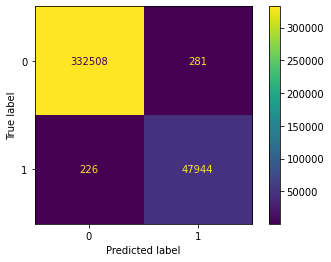

In [52]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

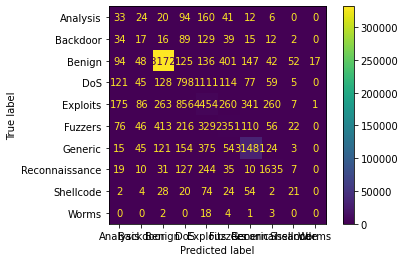

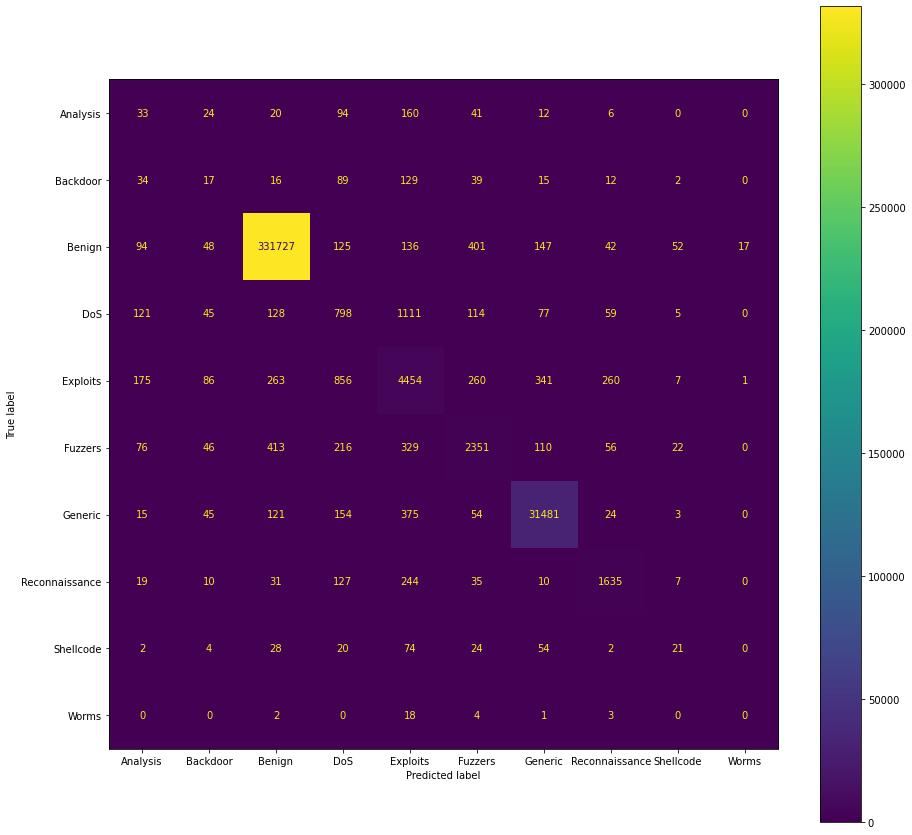

In [53]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [54]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [55]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9612194691715018

### Predição test50 multiclasse

In [58]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [59]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [60]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [61]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.7818994789993259

### Precision e Recall do test50

In [62]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   1.000000  0.955603  0.977298   1109226
           1   0.765366  1.000000  0.867090    160638

    accuracy                       0.961219   1269864
   macro avg   0.882683  0.977802  0.922194   1269864
weighted avg   0.970319  0.961219  0.963356   1269864



In [63]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.032000  0.074738  0.044813      1338
      Backdoor   0.041408  0.017182  0.024287      1164
        Benign   0.998076  0.787904  0.880624   1109226
           DoS   0.057896  0.027397  0.037194      8176
      Exploits   0.593283  0.265834  0.367156     22262
       Fuzzers   0.132956  0.133548  0.133251     12123
       Generic   0.297346  0.991656  0.457508    107740
Reconnaissance   0.841735  0.599314  0.700134      6993
     Shellcode   0.101399  0.038411  0.055716       755
         Worms   0.000000  0.000000  0.000000        87

      accuracy                       0.781899   1269864
     macro avg   0.309610  0.293598  0.270068   1269864
  weighted avg   0.913857  0.781899  0.819948   1269864



### Matriz de Confusão do test50

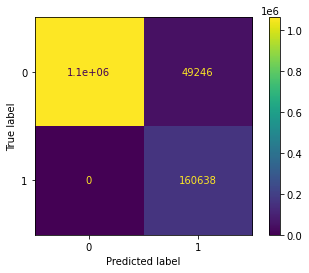

In [64]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

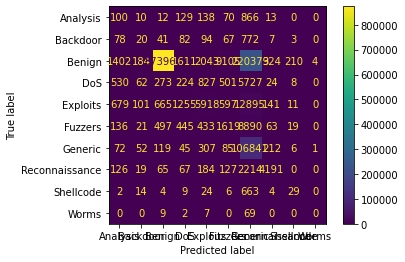

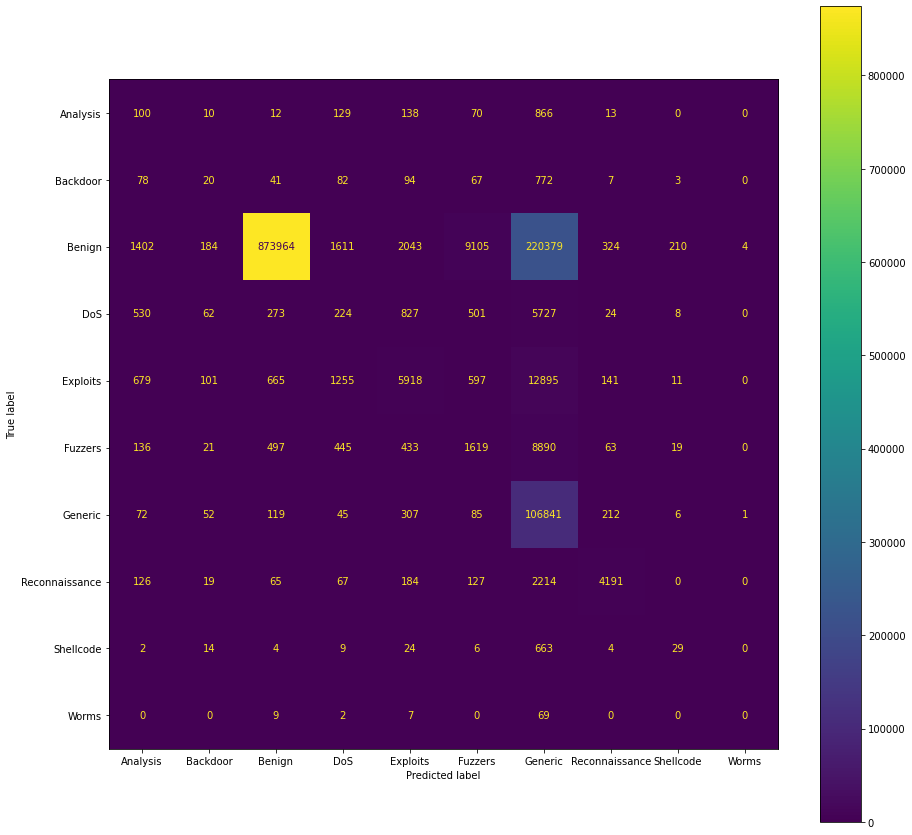

In [65]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)